In [1]:
import pandas as pd
import numpy as np
import vaex as vx
import matplotlib.pyplot as plt
import seaborn as sns
import time
from multiprocessing import Process
import gc
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.max_colwidth", 9999)
vx.settings.display.max_columns = 200
vx.settings.display.max_rows = 100
vx.settings.max_colwidth=60000
pd.set_option('display.float_format',lambda x : '%.4f' % x)
np.set_printoptions(suppress=True) #
pd.options.display.float_format = '{:.4f}'.format
%matplotlib inline

In [ ]:
'''
stripplot() 实现对数据分类的展现， 可作为而盒形图或小提琴图的补充
sns.stripplot(x=None,y=None,hue=None,data=None,order=None,hue_order=None,jitter=True,dodge=False,orient=None,color=None,palette=None,
size=5,edgecolor='gray',linewidth=0,ax=None,**kwargs)
x,y,hue:x=x,y=y,hue='class'
data:DataFrame, array or list
order,hue_order:  order=[x1,x2,x3,...]
jitter: float type, [True/1]  jitter=0.1 (让数据data分散开)
dodge：bool  =True则沿着分类轴，将数据分离出来成为不同色调级别的条带;否则，每个级别的点将相互叠加
orient： v|h   
color: matplotlib color
palette:调色版名称， list  dict 
size: float
edgecolor: matplotlib color,gray
linewidth:float 
'''

In [2]:
path = '../data/'
csv_nam_tips = 'tips.csv'

In [3]:
tips = pd.read_csv(path+csv_nam_tips)
print(tips.shape)
print(tips.columns)
print(tips.head(2))
tips.info()

(244, 7)
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
   total_bill    tip     sex smoker  day    time  size
0     16.9900 1.0100  Female     No  Sun  Dinner     2
1     10.3400 1.6600    Male     No  Sun  Dinner     3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
tips.describe()

,total_bill,tip,size
count,244.0000,244.0000,244.0000
mean,19.7859,2.9983,2.5697
std,8.9024,1.3836,0.9511
min,3.0700,1.0000,1.0000
25%,13.3475,2.0000,2.0000
50%,17.7950,2.9000,2.0000
75%,24.1275,3.5625,3.0000
max,50.8100,10.0000,6.0000


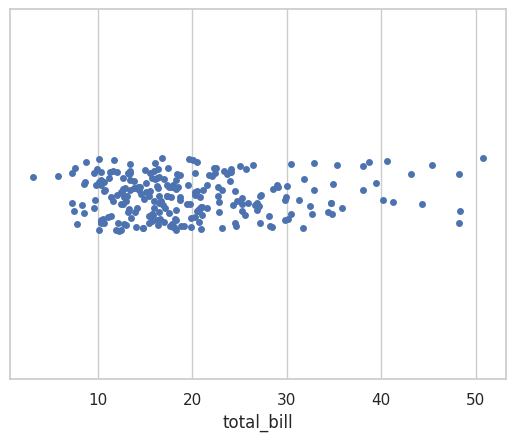

In [7]:
#1. stripplot
sns.set(style='whitegrid')
sns.stripplot(x=tips.total_bill)
plt.show()

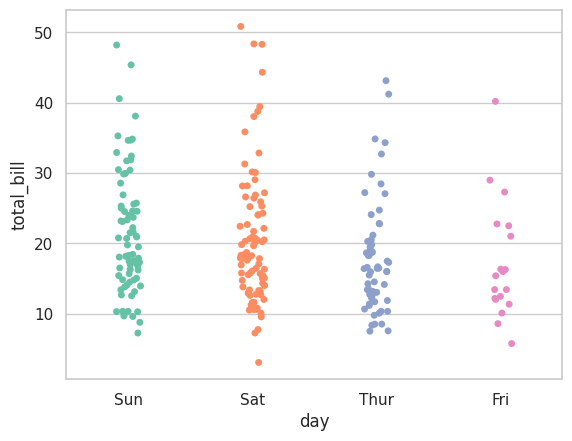

In [9]:
#2 x=x,y=y
plt.close('all')
sns.stripplot(x='day',y='total_bill',data=tips,palette='Set2')
plt.show()

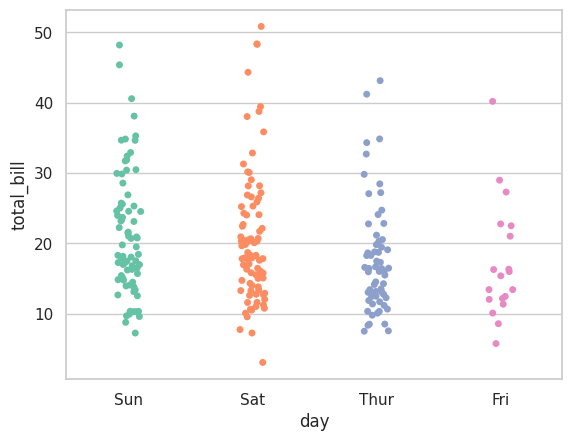

In [12]:
#3 x=x,y=y, jitter=True  根据分散
plt.close('all')
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,palette='Set2')
plt.show()

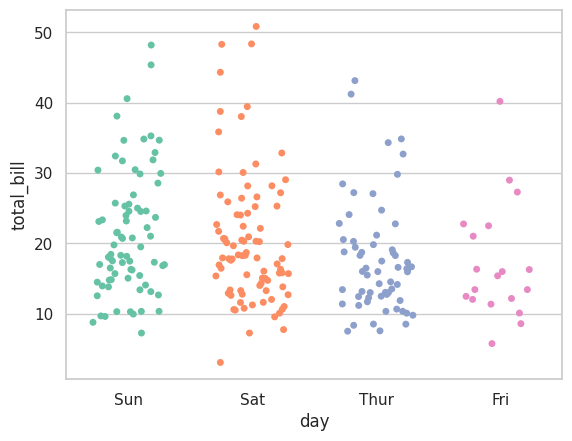

In [15]:
#4 x=x,y=y, jitter=0.3  根据分散
plt.close('all')
sns.stripplot(x='day',y='total_bill',data=tips,jitter=0.3,palette='Set2')
plt.show()

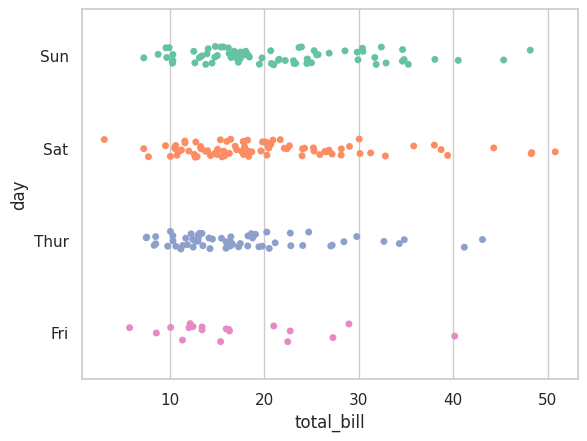

In [16]:
#5 x=x,y=y, jitter=True  根据分散
plt.close('all')
sns.stripplot(x='total_bill',y='day',data=tips,jitter=True,palette='Set2')
plt.show()

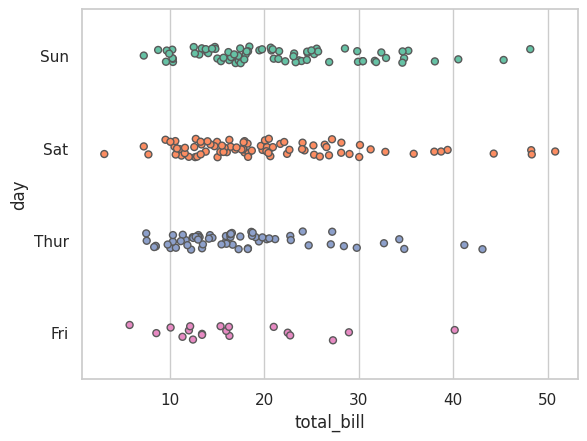

In [20]:
#6. linewidth=2 给数据点绘制轮廓，约大，轮廓越粗
plt.close('all')
sns.stripplot(x='total_bill',y='day',data=tips,jitter=True,palette='Set2',linewidth=1)
plt.show()

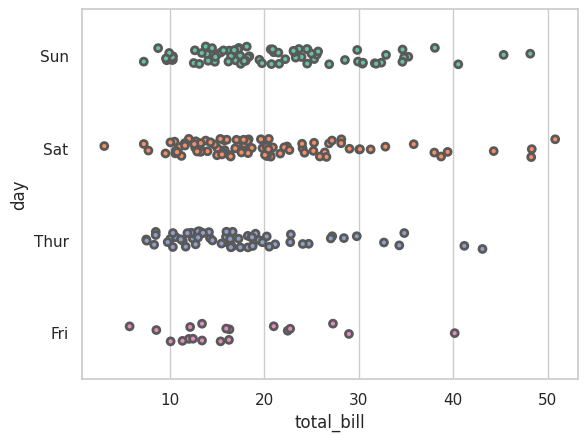

In [22]:
plt.close('all')
sns.stripplot(x='total_bill',y='day',data=tips,jitter=True,palette='Set2',linewidth=2)
plt.show()

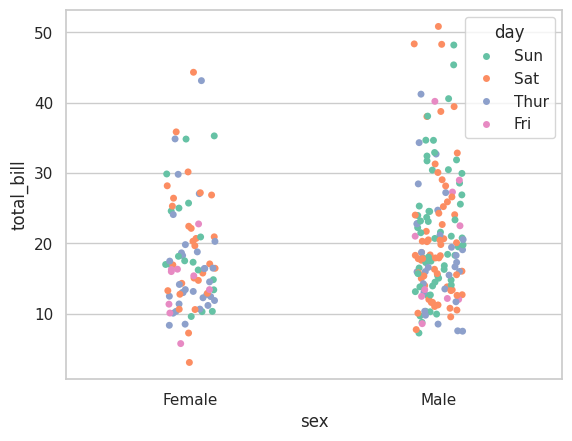

In [26]:
#7 hue=day
plt.close('all')
sns.stripplot(x='sex',y='total_bill',hue='day',data=tips,jitter=True,palette='Set2')
plt.show()

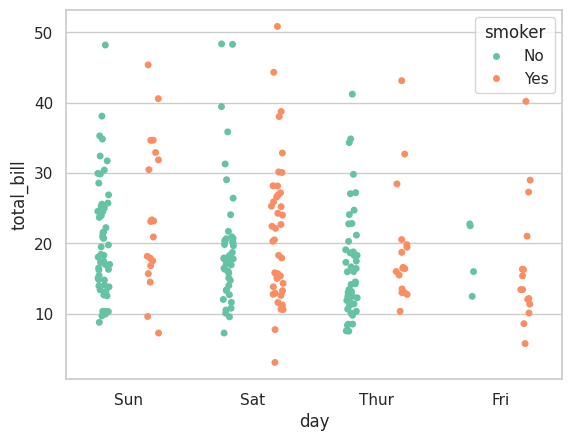

In [27]:
#8. hue='smoker', dodge=True  smoker:No,Yes 
plt.close('all')
sns.stripplot(x='day',y='total_bill',hue='smoker',data=tips,jitter=True,palette='Set2',dodge=True)
plt.show()

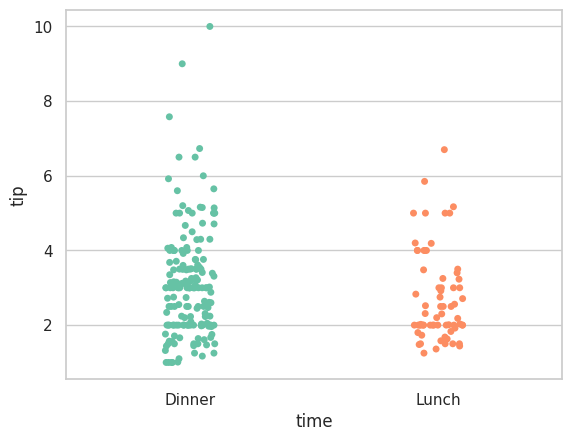

In [28]:
#9.order
plt.close('all')
sns.stripplot(x='time',y='tip',data=tips,jitter=True,palette='Set2',order=['Dinner','Lunch'])
plt.show()

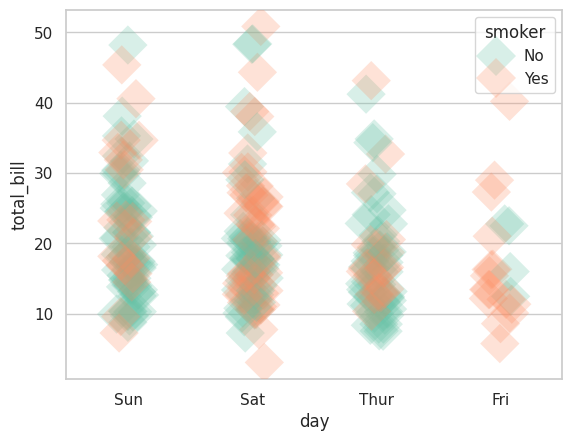

In [32]:
#10.size=20,marker='D',edgecolor='gray',alpha=.25
plt.close('all')
sns.stripplot(x='day',y='total_bill',hue='smoker',data=tips,jitter=True,palette='Set2',
              size=20,marker='D',edgecolor='gray',alpha=.25)
plt.show()

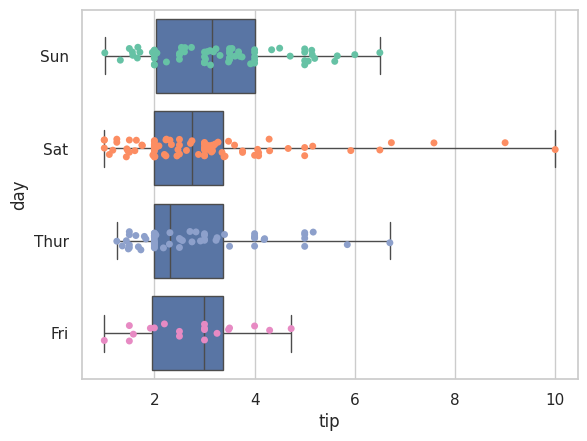

In [37]:
#11. 在箱图上绘制分类散点图
plt.close('all')
sns.boxplot(x='tip',y='day',data=tips,whis=np.inf)
sns.stripplot(x='tip',y='day',data=tips,jitter=True,color='.3',palette='Set2')
plt.show()

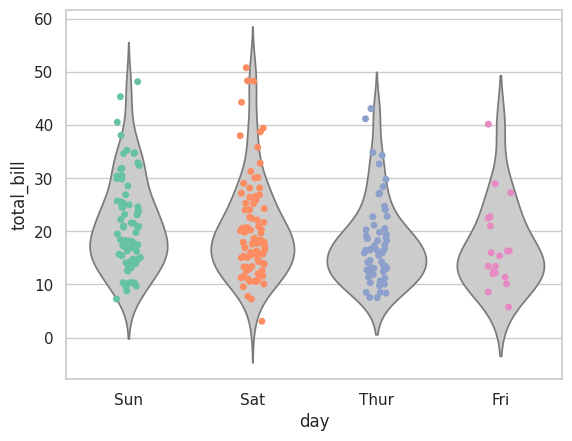

In [45]:
#12. 在小提琴图上绘制分类散图
plt.close('all')
sns.violinplot(x='day',y='total_bill',data=tips,inner=None,color='.8') # ,palette='Set2'
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,palette='Set2')
plt.show()

In [ ]:
'''
swarmplot()数据点不重叠的分类散点图 实现对数据分类的展现
sns.swarmplot(x=None,y=None,hue=None,data=None,order=None,hue_order=None,dodge=False,orient=None,color=None,palette=None,size=5,
edgecolor='gray',linewidth=0,ax=None,**kwargs)

'''

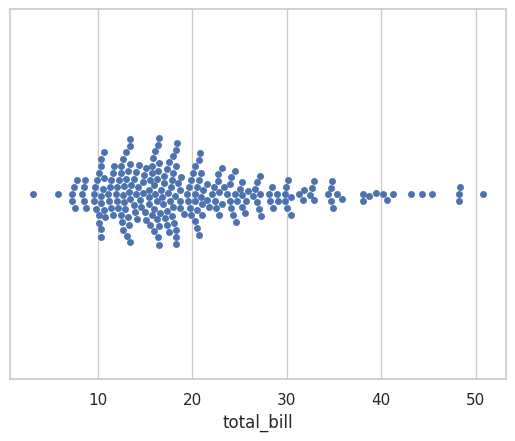

In [46]:
#1.
plt.close('all')
sns.swarmplot(x=tips['total_bill'])
plt.show()

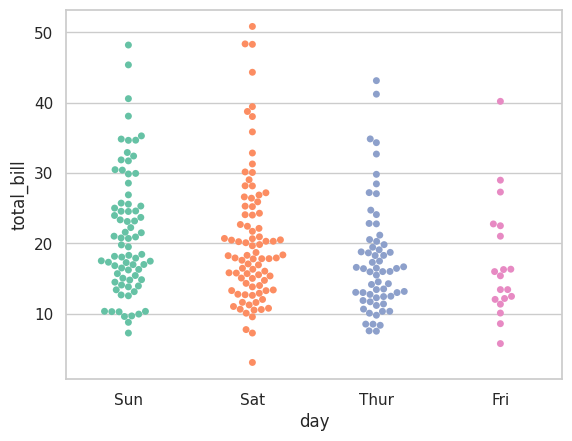

In [48]:
#2 x=x,y=y
plt.close('all')
sns.swarmplot(x='day',y='total_bill',data=tips,palette='Set2')
plt.show()

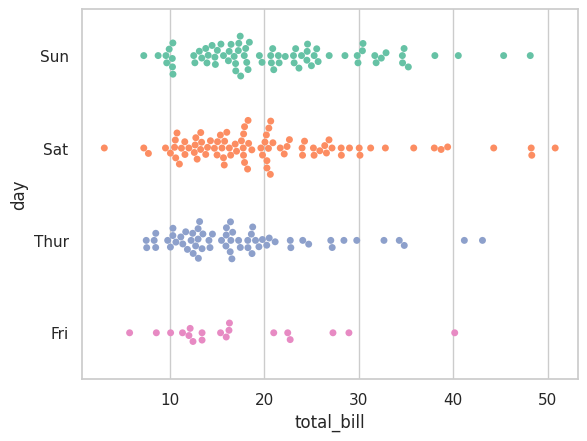

In [49]:
#3
plt.close('all')
sns.swarmplot(x='total_bill',y='day',data=tips,palette='Set2')
plt.show()

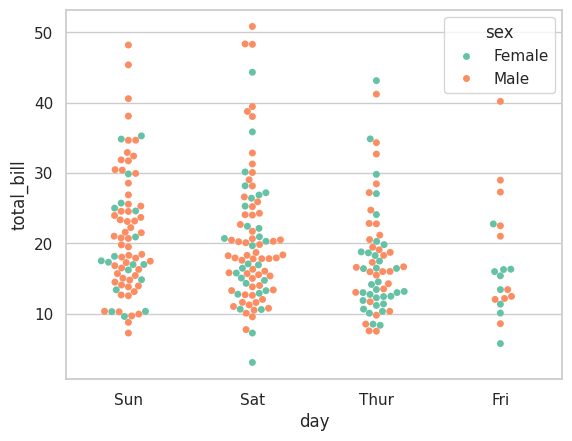

In [50]:
#4 hue='sex'
plt.close('all')
sns.swarmplot(x='day',y='total_bill',hue='sex',data=tips,palette='Set2')
plt.show()

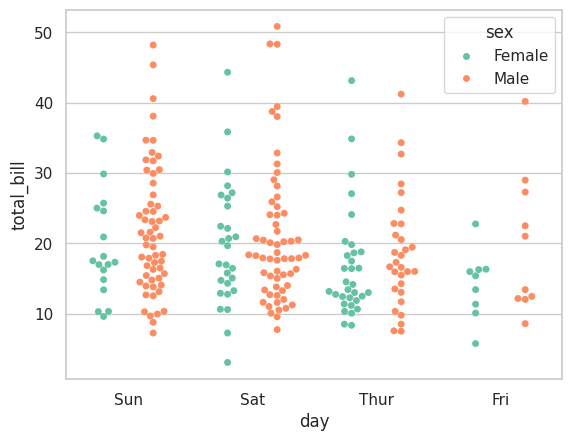

In [51]:
#5 dodge=True
plt.close('all')
sns.swarmplot(x='day',y='total_bill',hue='sex',data=tips,palette='Set2',dodge=True)
plt.show()

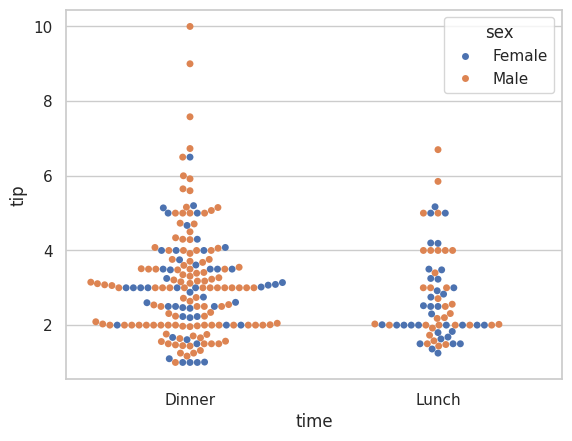

In [53]:
#6 order=['Dinner','Lunch']
plt.close('all')
sns.swarmplot(x='time',y='tip',hue='sex',data=tips,order=['Dinner','Lunch'])
plt.show()

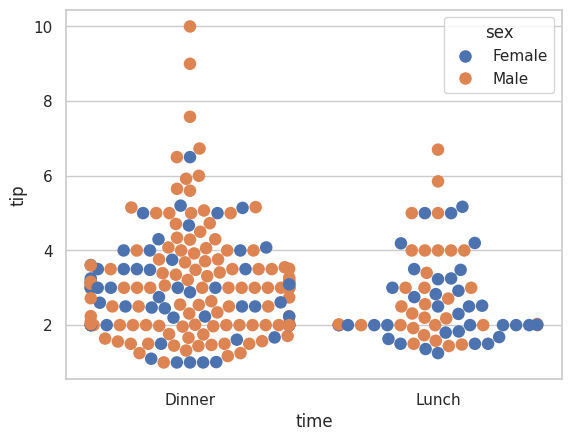

In [54]:
#7 size=9
plt.close('all')
sns.swarmplot(x='time',y='tip',hue='sex',data=tips,
              order=['Dinner','Lunch'],size=9)
plt.show()

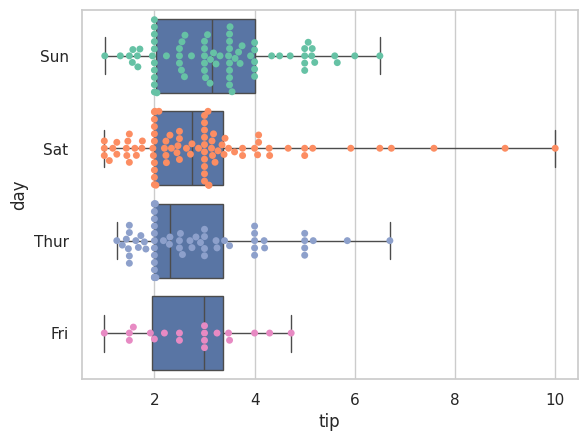

In [55]:
#8 boxplot() swarmplot()
plt.close('all')
sns.boxplot(x='tip',y='day',data=tips,whis=np.inf)
sns.swarmplot(x='tip',y='day',data=tips,color='.2',palette='Set2')
plt.show()

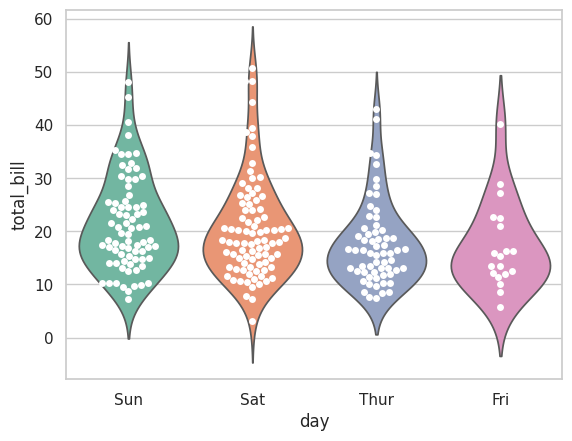

In [57]:
#9 violinplot() swarmplot()
plt.close('all')
sns.violinplot(x='day',y='total_bill',data=tips,inner=None,palette='Set2')
sns.swarmplot(x='day',y='total_bill',data=tips,color='white',edgecolor='gray')
plt.show()

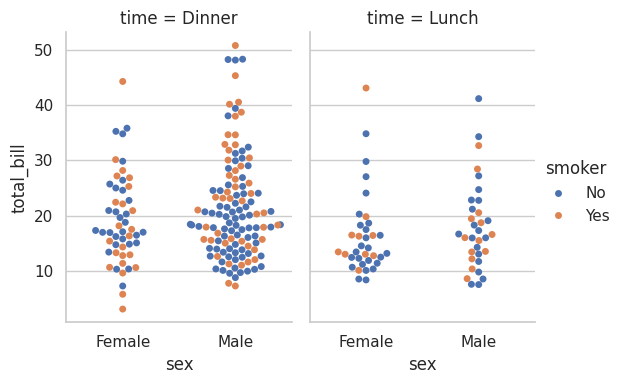

In [59]:
#10 sns.catplot()
plt.close('all')
sns.catplot(x='sex',y='total_bill',hue='smoker',col='time',data=tips,kind='swarm',height=4,aspect=.7)
plt.show()